In [ ]:
# Библиотека Matplotlib 
# объектно-ориентированный режим
# Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) 
# и координатных плоскостей (axes, или системы координат)

In [ ]:
# Процесс работы 
# сначала создаётся объект фигуры (fig)
# размер в дюймах (figsize
# метод add_axes() добавляется координатная плоскость
# а на ней располагаются графические объекты
# Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат
# она начинается в левом нижнем углу без отступов (координаты 0, 0)
# и занимает всё отведённое место в области (100%, ширина и высота равны 1).

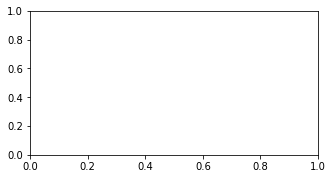

In [1]:
import matplotlib.pyplot as plt
# % matplotlib inline
# plt.style.use('default')

fig = plt.figure(figsize =(4,2))
axes = fig.add_axes([0,0,1,1])

In [2]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
display(covid_df.head(3))

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
# метод scatter()
# диаграмма рассеяния
# x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
# s — размер маркеров;
# marker — вид маркеров ('o' — точки, '^' — треугольники);
# c — цвет маркеров.

In [ ]:
# Axes.scatter(
# x, 
# y, 
# s=None, (size)
# c=None, (array-like or list of colors or color, optional)
# marker=None, 
# cmap=None, (cmap is only used if c is an array of floats)
# norm=None, 
# vmin=None, 
# vmax=None, 
# alpha=None, 
# linewidths=None, 
# *, 
# edgecolors=None, 
# plotnonfinite=False, 
# data=None, 
# **kwargs)

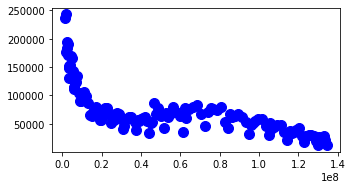

In [13]:
# построим диаграмму рассеяния, 
# которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) 
# от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.
# На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, 
# а по оси ординат — ежедневный прирост заболевших:

data_us = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize = (4,2))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x = data_us['people_fully_vaccinated'],
    y = data_us['daily_confirmed'],
    s = 100,
    marker = 'o',
    c = 'blue',
    
)


In [ ]:
# Из диаграммы видно, что, в основном, 
# с ростом числа привитых вторым компонентом людей заболеваемость падает, 
# замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше

In [ ]:
# метод pie()
# Plot a pie chart.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html

In [ ]:
# Основные параметры метода pie()
# x — значения, по которым будет строиться круговая диаграмма;
# labels — метки, соответствующие значениям;
# autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
# explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x

In [ ]:
# Axes.pie(
# x, 
# explode=None, 
# labels=None, 
# colors=None, 
# autopct=None, 
# pctdistance=0.6, 
# shadow=False, 
# labeldistance=1.1, 
# startangle=0, 
# radius=1, 
# counterclock=True, 
# wedgeprops=None, 
# textprops=None, 
# center=(0, 0), 
# frame=False, 
# rotatelabels=False, 
# *, 
# normalize=True, 
# data=None)

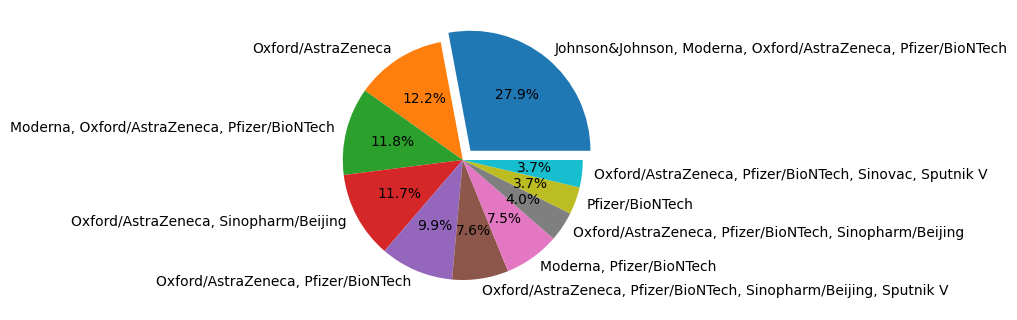

In [19]:
# ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). 
# Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. 
# Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

plt.style.use('default')
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize = (3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels = vaccine_combinations.index,
    autopct = '%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [ ]:
# Самой распространённой комбинацией вакцин является комбинация: 
# Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. 
# Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

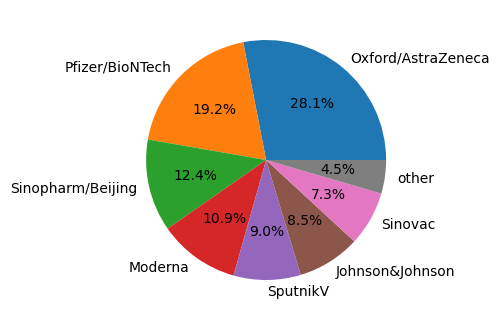

In [20]:
# Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности 
# и посчитать, в скольких странах она используется
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);
